In [1]:
import pandas as pd
import numpy as np

In [3]:
df_twitter=pd.read_csv("train.csv")

In [4]:
df_twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
import seaborn as sns
sns.countplot('label',data=df_twitter)

In [6]:
df_twitter.shape

(31962, 3)

In [7]:
df_twitter.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
df_twitter.drop('id',axis=1,inplace=True)

In [10]:
df_offensive=pd.read_csv("labeled_data.csv")

In [11]:
df_offensive.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
df_offensive.shape

(24783, 7)

In [15]:
df_offensive.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [16]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [17]:
df_offensive.head(10)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [18]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

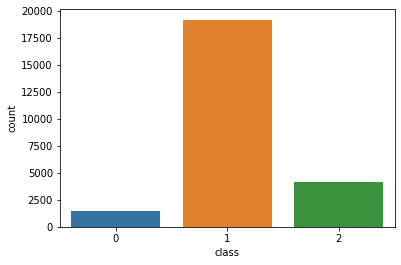

In [19]:
sns.countplot('class',data=df_offensive)

In [20]:
df_offensive[df_offensive['class']==0]['class']=1

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_offensive.head(5)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [22]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

In [23]:
df_offensive[df_offensive['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [24]:
df_offensive["class"].replace({0: 1}, inplace=True)

In [25]:
df_offensive['class'].unique()

array([2, 1], dtype=int64)

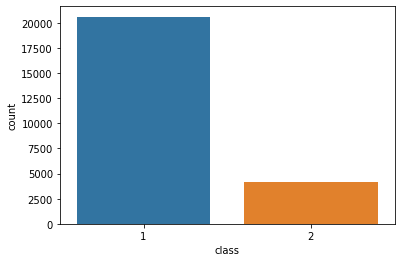

In [26]:
sns.countplot('class',data=df_offensive)

In [27]:
df_offensive[df_offensive['class']==0]

,class,tweet


In [28]:
df_offensive["class"].replace({2: 0}, inplace=True)

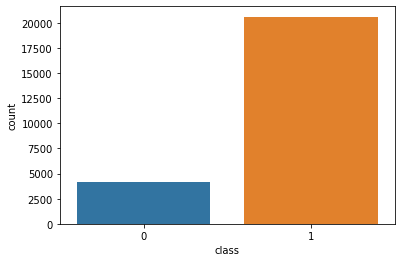

In [29]:
sns.countplot('class',data=df_offensive)

In [30]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)

In [31]:
df_offensive.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [33]:
df_offensive.iloc[0]['tweet']

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [34]:
df_offensive.iloc[5]['tweet']

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

In [35]:
frame=[df_twitter,df_offensive]
df = pd.concat(frame)

In [36]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


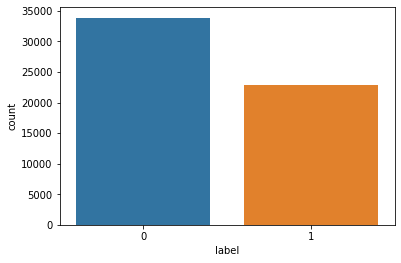

In [37]:
sns.countplot('label',data=df)

In [38]:
df.shape

(56745, 2)

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAMSUNG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [43]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [44]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [45]:
df.to_csv('test.csv',index=False)

In [46]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
def make_wordcloud(df):
    comment_words=""
    for val in df.tweet: 
        val = str(val).lower()

      
        comment_words += " ".join(val)+" "
    print(comment_words[0:100])
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)
  
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [52]:
# make_wordcloud(df[df['label']==0])
df.to_csv('testing.csv',index=False)
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [53]:
x=df['tweet']
y=df['label']
type(x)

pandas.core.series.Series

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


#print(len(x_train), len(y_train))
#print(len(x_test), len(y_test))
type(x_train)

pandas.core.series.Series

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform(x_train)

In [58]:
x_test_vectorizer=count.transform(x_test)
x_train_vectorizer.toarray()

MemoryError: 

In [40]:
count.vocabulary_

NameError: name 'count' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))